In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# Muss dann für Live Version wieder aktiviert werden bzw. Manuell erzeugte Logs machen
warnings.filterwarnings('ignore')
import datetime as dt
import requests
import json
from openpyxl import load_workbook
import xml.etree.ElementTree as ET

# LOADING ELECTRICITY GENERATION

The Data generated by this top part is currently not used. Mainly as it is on a yearly basis and not monthly or daily

In [174]:
import requests
import json

# Set API endpoint and parameters
url = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/.ELECTRICITY.TOT.GWH.A/OECD?contentType=json&startPeriod=2000'
# Make API request
response = requests.get(url)

# Check response status code
if response.status_code == 200:
    # Parse JSON response
    data = json.loads(response.text)
    
    # Extract data and metadata
    series = data['dataSets'][0]['series']
    dimensions = data['structure']['dimensions']['observation']
    dimensions2 = data['structure']['dimensions']['series']
    
    # Print data and metadata
    print('Dimensions:', dimensions)
    print('Attributes:', dimensions2)
    print('Series:', series)
else:
    print('Error:', response.status_code)


Dimensions: [{'id': 'TIME_PERIOD', 'name': 'Time', 'values': [{'id': '2000', 'name': '2000'}, {'id': '2001', 'name': '2001'}, {'id': '2002', 'name': '2002'}, {'id': '2003', 'name': '2003'}, {'id': '2004', 'name': '2004'}, {'id': '2005', 'name': '2005'}, {'id': '2006', 'name': '2006'}, {'id': '2007', 'name': '2007'}, {'id': '2008', 'name': '2008'}, {'id': '2009', 'name': '2009'}, {'id': '2010', 'name': '2010'}, {'id': '2011', 'name': '2011'}, {'id': '2012', 'name': '2012'}, {'id': '2013', 'name': '2013'}, {'id': '2014', 'name': '2014'}, {'id': '2015', 'name': '2015'}, {'id': '2016', 'name': '2016'}, {'id': '2017', 'name': '2017'}, {'id': '2018', 'name': '2018'}, {'id': '2019', 'name': '2019'}, {'id': '2020', 'name': '2020'}, {'id': '2021', 'name': '2021'}], 'role': 'TIME_PERIOD'}]
Attributes: [{'keyPosition': 0, 'id': 'LOCATION', 'name': 'Country', 'values': [{'id': 'AUS', 'name': 'Australia'}, {'id': 'AUT', 'name': 'Austria'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'CAN', 'name': 'Ca

In [175]:
df = pd.DataFrame.from_dict(series, orient='index')

# Split observations into separate columns
df = df.apply(lambda x: pd.Series(x['observations']), axis=1)

In [176]:
dimensions[0]['values']

[{'id': '2000', 'name': '2000'},
 {'id': '2001', 'name': '2001'},
 {'id': '2002', 'name': '2002'},
 {'id': '2003', 'name': '2003'},
 {'id': '2004', 'name': '2004'},
 {'id': '2005', 'name': '2005'},
 {'id': '2006', 'name': '2006'},
 {'id': '2007', 'name': '2007'},
 {'id': '2008', 'name': '2008'},
 {'id': '2009', 'name': '2009'},
 {'id': '2010', 'name': '2010'},
 {'id': '2011', 'name': '2011'},
 {'id': '2012', 'name': '2012'},
 {'id': '2013', 'name': '2013'},
 {'id': '2014', 'name': '2014'},
 {'id': '2015', 'name': '2015'},
 {'id': '2016', 'name': '2016'},
 {'id': '2017', 'name': '2017'},
 {'id': '2018', 'name': '2018'},
 {'id': '2019', 'name': '2019'},
 {'id': '2020', 'name': '2020'},
 {'id': '2021', 'name': '2021'}]

In [177]:
# for every column in the dataframe use only the first value of the list
for col in df.columns:
    df[col] = df[col].str[0]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0:0:0:0:0,195402.0,206772.0,213004.0,205309.0,210162.0,214526.0,218390.0,227066.0,228073.0,232688.0,...,236580.0,235522.0,232621.0,238533.0,243262.0,243517.000,247292.000,250531.000,251913.481,None
1:0:0:0:0,59054.0,60111.0,59937.0,57413.0,61387.0,63671.0,61228.0,61810.0,63589.0,66032.0,...,69525.0,65260.0,62248.0,61928.0,64961.0,68093.595,65383.711,71101.128,69424.515,None
2:0:0:0:0,80266.0,76216.0,78147.0,80858.0,80705.0,82310.0,81161.0,84581.0,81082.0,87661.0,...,79919.0,80300.0,69818.0,67380.0,82401.0,83122.900,72065.100,89913.400,86055.100,None
3:0:0:0:0,586662.0,570523.0,582106.0,570542.0,580517.0,601167.0,590622.0,608360.0,613812.0,590537.0,...,613532.0,638562.0,639348.0,638494.0,646728.0,644699.000,639661.000,634022.000,633844.000,None
4:0:0:0:0,68014.0,68780.0,70393.0,76659.0,77919.0,76192.0,77884.0,81412.0,77085.0,75990.0,...,80309.0,79777.0,79116.0,76916.0,76398.0,79885.766,80861.141,80116.433,75067.275,None


In [178]:
df2 = pd.DataFrame(dimensions[0]['values'])

In [179]:
df3 = pd.DataFrame(dimensions2[0]['values'])
df3.head()

,id,name
0,AUS,Australia
1,AUT,Austria
2,BEL,Belgium
3,CAN,Canada
4,CZE,Czech Republic


In [180]:
df.columns = df2['name']
df = df.set_index(df3['name'])
df = df.reset_index()

In [181]:
df.head()

name,name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,195402.0,206772.0,213004.0,205309.0,210162.0,214526.0,218390.0,227066.0,228073.0,...,236580.0,235522.0,232621.0,238533.0,243262.0,243517.000,247292.000,250531.000,251913.481,None
1,Austria,59054.0,60111.0,59937.0,57413.0,61387.0,63671.0,61228.0,61810.0,63589.0,...,69525.0,65260.0,62248.0,61928.0,64961.0,68093.595,65383.711,71101.128,69424.515,None
2,Belgium,80266.0,76216.0,78147.0,80858.0,80705.0,82310.0,81161.0,84581.0,81082.0,...,79919.0,80300.0,69818.0,67380.0,82401.0,83122.900,72065.100,89913.400,86055.100,None
3,Canada,586662.0,570523.0,582106.0,570542.0,580517.0,601167.0,590622.0,608360.0,613812.0,...,613532.0,638562.0,639348.0,638494.0,646728.0,644699.000,639661.000,634022.000,633844.000,None
4,Czech Republic,68014.0,68780.0,70393.0,76659.0,77919.0,76192.0,77884.0,81412.0,77085.0,...,80309.0,79777.0,79116.0,76916.0,76398.0,79885.766,80861.141,80116.433,75067.275,None


In [182]:
# transpose the dataframe
df = df.T
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df[1:]
df.head()

,name,Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,...,Malta,Moldova,Romania,Ukraine,Serbia,Montenegro,Costa Rica,North Macedonia,European Union (28 countries),European Union – 27 countries (from 01/02/2020)
1,2000,195402.0,59054.0,80266.0,586662.0,68014.0,34448.0,67288.0,516109.0,538489.0,...,1802.0,5358.0,48625.0,0.0,0.0,NaN,6840.0,6327.0,2873389.0,2512624.0
2,2001,206772.0,60111.0,76216.0,570523.0,68780.0,36165.0,71237.0,525951.0,548166.0,...,1825.0,5700.0,50423.0,0.0,0.0,NaN,6664.0,5856.0,2954913.0,2587521.0
3,2002,213004.0,59937.0,78147.0,582106.0,70393.0,37336.0,71632.0,534837.0,549288.0,...,1927.0,5453.0,51056.0,0.0,0.0,NaN,7264.0,5610.0,2976247.0,2606126.0
4,2003,205309.0,57413.0,80858.0,570542.0,76659.0,43754.0,80397.0,542213.0,569713.0,...,2100.0,5692.0,51317.0,0.0,0.0,NaN,7386.0,6267.0,3064448.0,2684376.0
5,2004,210162.0,61387.0,80705.0,580517.0,77919.0,38402.0,82191.0,549322.0,578577.0,...,2081.0,5542.0,52693.0,0.0,0.0,NaN,8102.0,6199.0,3132064.0,2755160.0


In [183]:
# export to csv
df.to_csv('../Data/oecd_data.csv', index=False)

## 

# Consumerprices OECD Energy

This Data is temporarily used in the Tableau Dashboard, but we found better data below

In [184]:
# Set API endpoint and parameters

url = 'https://stats.oecd.org/SDMX-JSON/data/PRICES_CPI/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+EU27_2020+EA20+G-7+OECDE+G-20+OECD+NMEC+ARG+BRA+CHN+IND+IDN+RUS+SAU+ZAF.CPGREN01+CP18GREN.GY.A+Q+M/all?startTime=2015&endTime=2023&dimensionAtObservation=allDimensions'
# Make API request
response = requests.get(url)


In [185]:
response.content

b'{"header":{"id":"37fd3a75-902e-4e1d-bf7b-8f0a0ef4f1e4","test":false,"prepared":"2023-05-05T08:53:45.6304299Z","sender":{"id":"OECD","name":"Organisation for Economic Co-operation and Development"},"links":[{"href":"https://stats.oecd.org:443/SDMX-JSON/data/PRICES_CPI/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+EU27_2020+EA20+G-7+OECDE+G-20+OECD+NMEC+ARG+BRA+CHN+IND+IDN+RUS+SAU+ZAF.CPGREN01+CP18GREN.GY.A+Q+M/all?startTime=2015&endTime=2023&dimensionAtObservation=allDimensions","rel":"request"}]},"dataSets":[{"action":"Information","observations":{"0:0:0:0:0":[-6.839244,0,null,0,0,null],"0:0:0:0:1":[-5.928187,0,null,0,0,null],"0:0:0:0:2":[-6.787834,0,null,0,0,null],"0:0:0:0:3":[-7.538101,0,null,0,0,null],"0:0:0:0:4":[-4.940179,0,null,0,0,null],"0:0:0:0:5":[-4.799736,0,null,0,0,null],"0:0:0:0:6":[-4.319934,0,null,0,0,null],"0:0:0:0:7":[0.8832672,0,null,0,0,null],"0:0:0:0:8":[3.957

In [186]:

# Check response status code
if response.status_code == 200:
    # Parse JSON response
    data = json.loads(response.text)
    
    # Extract data and metadata
   # series = data['dataSets'][0]['series']
    dimensions = data['structure']['dimensions']['observation']
 #   dimensions2 = data['structure']['dimensions']['series']
    
    # Print data and metadata
    print('Dimensions:', dimensions)
    print('Attributes:', dimensions2)
    print('Series:', series)
else:
    print('Error:', response.status_code)

Dimensions: [{'keyPosition': 0, 'id': 'LOCATION', 'name': 'Country', 'values': [{'id': 'DNK', 'name': 'Denmark'}, {'id': 'GRC', 'name': 'Greece'}, {'id': 'HUN', 'name': 'Hungary'}, {'id': 'MEX', 'name': 'Mexico'}, {'id': 'NLD', 'name': 'Netherlands'}, {'id': 'NOR', 'name': 'Norway'}, {'id': 'PRT', 'name': 'Portugal'}, {'id': 'SWE', 'name': 'Sweden'}, {'id': 'CHL', 'name': 'Chile'}, {'id': 'COL', 'name': 'Colombia'}, {'id': 'CRI', 'name': 'Costa Rica'}, {'id': 'LVA', 'name': 'Latvia'}, {'id': 'CAN', 'name': 'Canada'}, {'id': 'BEL', 'name': 'Belgium'}, {'id': 'IRL', 'name': 'Ireland'}, {'id': 'FIN', 'name': 'Finland'}, {'id': 'LUX', 'name': 'Luxembourg'}, {'id': 'POL', 'name': 'Poland'}, {'id': 'OECDE', 'name': 'OECD - Europe'}, {'id': 'EST', 'name': 'Estonia'}, {'id': 'AUT', 'name': 'Austria'}, {'id': 'USA', 'name': 'United States'}, {'id': 'ZAF', 'name': 'South Africa'}, {'id': 'RUS', 'name': 'Russia'}, {'id': 'ESP', 'name': 'Spain'}, {'id': 'ITA', 'name': 'Italy'}, {'id': 'ISL', 'name

In [187]:
series = data['dataSets'][0]['observations']

In [188]:
df_5 = pd.DataFrame.from_dict(series, orient='index')

# Split observations into separate columns
#df_5 = df_5.apply(lambda x: pd.Series(x['observations']), axis=1)

In [189]:
df_5.head()

,0,1,2,3,4,5
0:0:0:0:0,-6.839244,0,None,0,0,None
0:0:0:0:1,-5.928187,0,None,0,0,None
0:0:0:0:2,-6.787834,0,None,0,0,None
0:0:0:0:3,-7.538101,0,None,0,0,None
0:0:0:0:4,-4.940179,0,None,0,0,None


In [190]:
data

{'header': {'id': '37fd3a75-902e-4e1d-bf7b-8f0a0ef4f1e4',
  'test': False,
  'prepared': '2023-05-05T08:53:45.6304299Z',
  'sender': {'id': 'OECD',
   'name': 'Organisation for Economic Co-operation and Development'},
  'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/PRICES_CPI/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+EU27_2020+EA20+G-7+OECDE+G-20+OECD+NMEC+ARG+BRA+CHN+IND+IDN+RUS+SAU+ZAF.CPGREN01+CP18GREN.GY.A+Q+M/all?startTime=2015&endTime=2023&dimensionAtObservation=allDimensions',
    'rel': 'request'}]},
 'dataSets': [{'action': 'Information',
   'observations': {'0:0:0:0:0': [-6.839244, 0, None, 0, 0, None],
    '0:0:0:0:1': [-5.928187, 0, None, 0, 0, None],
    '0:0:0:0:2': [-6.787834, 0, None, 0, 0, None],
    '0:0:0:0:3': [-7.538101, 0, None, 0, 0, None],
    '0:0:0:0:4': [-4.940179, 0, None, 0, 0, None],
    '0:0:0:0:5': [-4.799736, 0, None, 0, 0, None]

# RTE Data France

Here we get the Energy generation Data from France via the RTE API <br>
I needed to Create an Application on the Website to get a client id and secret. <br>
after that i can subscribe to an API endpoint and can access the Data

In [191]:
import requests
from requests.auth import HTTPBasicAuth

# This is the URL to get  the token
oauthurl = "https://digital.iservices.rte-france.com/token/oauth"
# This is the URL to get the data
url = "https://digital.iservices.rte-france.com/open_api/actual_generation/v1/sandbox/actual_generations_per_production_type"
# These are the credentials to get the token
client_id = "9193848f-833f-4a25-aea9-84ad6cacddd4"
client_secret = "4eec2909-64e8-43be-be11-493131b580ce"
# This is the payload to get the token
auth = HTTPBasicAuth(client_id, client_secret)

response = requests.get(oauthurl, auth=auth)
# Check response status code
if response.status_code == 200:
    # If the response is OK, get the token from the response
    data = response.json()
    token = data['access_token']
else:
    print("Error:", response.status_code, response.reason)

From here we use the Token for further Data access

In [192]:
# Set the headers with the token to make the request
headers = {
    "Authorization": "Bearer " + token
}
# Make the request
response = requests.get(url, headers=headers)
# Check response status code
if response.status_code == 200:
    # If the response is OK, get the data from the response
    data = response.json()
else:
    print("Error:", response.status_code, response.reason)

In [193]:
data

{'actual_generations_per_production_type': [{'start_date': '2016-01-29T00:00:00+01:00',
   'end_date': '2016-01-29T18:17:05+01:00',
   'production_type': 'BIOMASS',
   'values': [{'start_date': '2016-01-29T00:00:00+01:00',
     'end_date': '2016-01-29T01:00:00+01:00',
     'updated_date': '2016-01-29T00:00:00+01:00',
     'value': 261},
    {'start_date': '2016-01-29T01:00:00+01:00',
     'end_date': '2016-01-29T02:00:00+01:00',
     'updated_date': '2016-01-29T00:00:00+01:00',
     'value': 261},
    {'start_date': '2016-01-29T02:00:00+01:00',
     'end_date': '2016-01-29T03:00:00+01:00',
     'updated_date': '2016-01-29T00:00:00+01:00',
     'value': 261},
    {'start_date': '2016-01-29T04:00:00+01:00',
     'end_date': '2016-01-29T05:00:00+01:00',
     'updated_date': '2016-01-29T00:00:00+01:00',
     'value': 262},
    {'start_date': '2016-01-29T05:00:00+01:00',
     'end_date': '2016-01-29T06:00:00+01:00',
     'updated_date': '2016-01-29T00:00:00+01:00',
     'value': 261},
    {

# SMARD Data Germany

On this website you can check some availabe Datasets <br>
https://www.smard.de/home/downloadcenter/download-marktdaten/?downloadAttributes=%7B%22selectedCategory%22:1,%22selectedSubCategory%22:1,%22selectedRegion%22:%22DE%22,%22selectedFileType%22:%22CSV%22,%22from%22:1546297200000,%22to%22:1683323999999%7D <br><br>
the Request can be made in this format : https://www.smard.de/app/chart_data/{filter}/{region}/{filterCopy}_{regionCopy}_{resolution}_{timestamp}.json
<br>
<br>
The API is documented here: https://smard.api.bund.dev/ 
<br>
<br>

In [3]:
# Define function to get data from smard.de API 
def get_smard_data(filter,region,resolution,timestamp):
    # build url
    url = f'https://www.smard.de/app/chart_data/{filter}/{region}/{filter}_{region}_{resolution}_{timestamp}.json'

    # make request
    response = requests.get(url)
    # check status code
    if response.status_code == 200:
        # parse json
        data = response.json()
    else:
        print("Error:", response.status_code, response.reason)
    return data

In [195]:
region = 'DE'
resolution = 'day'
# Date from 1.1.2015 to 1.1.2023
timestamps = ['1420066800000','1451602800000','1483225200000','1514761200000','1546297200000', '1577833200000', '1609455600000', '1640991600000', '1672527600000']
filterlist = ['1223', '1224', '1225', '1226', '1227', '1228', '4066', '4067', '4068', '4069', '4070', '4071', '410', '4359', '4387']
namelist = ['Braunkohle', 'Kernenergie', 'Wind Offshore', 'Wasserkraft', 'Sonstige Konventionelle', 'Sonstige Erneuerbare', 'Biomasse', 'Wind Onshore', 'Photovoltaik', 'Steinkohle', 'Pumpspeicher', 'Erdgas', 'Gesamt (Netzlast)', 'Residuallast', 'Stromerzeugung']

# creating main dataframe
df_complete = pd.DataFrame()
df_complete.insert(0, 'timestamp', [])
for name in namelist:
    df_complete.insert(namelist.index(name)+1, name, [])

# loop over the timestamps and get the data for each timestamp (as data only gives the data for one year)
for timestamp in timestamps:
    print("timestamp: " + timestamp)
    df = pd.DataFrame()
    df.insert(0, 'timestamp', [])
    # loop over the filterlist and get the data for each filter
    for filter in filterlist:
        data = get_smard_data(filter,region,resolution, timestamp)
        print("temporarily created df: " + namelist[filterlist.index(filter)])
        df2 = pd.DataFrame(data['series'])
        df2.columns = df2.columns = ['timestamp', namelist[filterlist.index(filter)]]
        df = pd.merge(df, df2, on='timestamp', how='outer')
    # append the dataframes for each timestamp
    df_complete = df_complete.append(df, ignore_index=True)
df_complete.head()




timestamp: 1420066800000
temporarily created df: Braunkohle
temporarily created df: Kernenergie
temporarily created df: Wind Offshore
temporarily created df: Wasserkraft
temporarily created df: Sonstige Konventionelle
temporarily created df: Sonstige Erneuerbare
temporarily created df: Biomasse
temporarily created df: Wind Onshore
temporarily created df: Photovoltaik
temporarily created df: Steinkohle
temporarily created df: Pumpspeicher
temporarily created df: Erdgas
temporarily created df: Gesamt (Netzlast)
temporarily created df: Residuallast
temporarily created df: Stromerzeugung
timestamp: 1451602800000
temporarily created df: Braunkohle
temporarily created df: Kernenergie
temporarily created df: Wind Offshore
temporarily created df: Wasserkraft
temporarily created df: Sonstige Konventionelle
temporarily created df: Sonstige Erneuerbare
temporarily created df: Biomasse
temporarily created df: Wind Onshore
temporarily created df: Photovoltaik
temporarily created df: Steinkohle
temp

,timestamp,Braunkohle,Kernenergie,Wind Offshore,Wasserkraft,Sonstige Konventionelle,Sonstige Erneuerbare,Biomasse,Wind Onshore,Photovoltaik,Steinkohle,Pumpspeicher,Erdgas,Gesamt (Netzlast),Residuallast,Stromerzeugung
0,1.420067e+12,314599.00,251485.25,12508.50,27463.00,134117.00,2148.50,96341.25,298791.75,17080.25,60725.25,23683.50,23806.00,1096852.75,768472.25,25895.50
1,1.420153e+12,257344.00,218435.50,10329.25,27087.75,148762.00,2904.00,96247.25,591620.75,7759.00,83617.25,25524.75,29919.25,1288914.75,679205.75,27225.00
2,1.420240e+12,296727.50,245251.50,12119.50,31135.75,139297.00,3245.00,95923.75,457043.50,7234.75,60999.25,26328.75,29790.75,1213309.50,736911.75,24694.25
3,1.420326e+12,287900.50,251627.75,11538.50,42212.25,132493.75,3247.00,96885.00,379029.50,19982.50,47224.50,26499.25,21470.75,1177896.00,767345.50,24441.75
4,1.420412e+12,405171.25,267081.00,7745.50,38092.50,207876.00,3217.75,96449.00,219623.50,26522.25,177046.75,25738.50,35151.75,1425927.50,1172036.25,25733.25


In [196]:

# make timestamp column to datetime for better readability
df_complete['timestamp'] = pd.to_datetime(df_complete['timestamp'], unit='ms')
df_complete = df_complete.set_index('timestamp')


<AxesSubplot:xlabel='timestamp'>

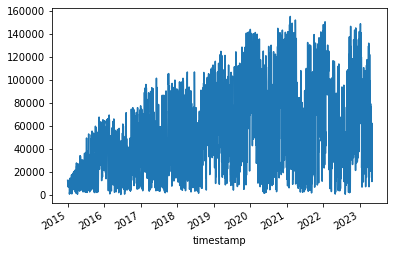

In [197]:
df_complete['Wind Offshore'].plot()

Same process but for Market Data

In [11]:
region = 'DE'
resolution = 'day'
# Attention, different timestamps than before, because the data is not available for the whole time period
timestamps = ['1514761200000','1546297200000','1577833200000','1609455600000','1640991600000', '1672527600000']
filterlist = ['4169','259','4170','255','254']
namelist = ['Marktpreis_deutschland', 'Marktpreis_Schweiz', 'Marktpreis_Österreich', 'Marktpreis_Italien_Nord','Marktpreis_Frankreich']

df_complete_price = pd.DataFrame()
df_complete_price.insert(0, 'timestamp', [])
for name in namelist:
    df_complete_price.insert(namelist.index(name)+1, name, [])

# loop over the timestamps and get the data for each timestamp
for timestamp in timestamps:
    print("timestamp: " + timestamp)
    df = pd.DataFrame()
    df.insert(0, 'timestamp', [])
    # loop over the filterlist and get the data for each filter
    for filter in filterlist:
        data = get_smard_data(filter,region,resolution, timestamp)
        print("temporarily created df: " + namelist[filterlist.index(filter)])
        df2 = pd.DataFrame(data['series'])
        df2.columns = df2.columns = ['timestamp', namelist[filterlist.index(filter)]]
        df = pd.merge(df, df2, on='timestamp', how='outer')
    df_complete_price = df_complete_price.append(df, ignore_index=True)
df_complete_price.head()

timestamp: 1514761200000
temporarily created df: Marktpreis_deutschland
temporarily created df: Marktpreis_Schweiz
temporarily created df: Marktpreis_Österreich
temporarily created df: Marktpreis_Italien_Nord
temporarily created df: Marktpreis_Frankreich
timestamp: 1546297200000
temporarily created df: Marktpreis_deutschland
temporarily created df: Marktpreis_Schweiz
temporarily created df: Marktpreis_Österreich
temporarily created df: Marktpreis_Italien_Nord
temporarily created df: Marktpreis_Frankreich
timestamp: 1577833200000
temporarily created df: Marktpreis_deutschland
temporarily created df: Marktpreis_Schweiz
temporarily created df: Marktpreis_Österreich
temporarily created df: Marktpreis_Italien_Nord
temporarily created df: Marktpreis_Frankreich
timestamp: 1609455600000
temporarily created df: Marktpreis_deutschland
temporarily created df: Marktpreis_Schweiz
temporarily created df: Marktpreis_Österreich
temporarily created df: Marktpreis_Italien_Nord
temporarily created df: Ma

,timestamp,Marktpreis_deutschland,Marktpreis_Schweiz,Marktpreis_Österreich,Marktpreis_Italien_Nord,Marktpreis_Frankreich
0,1.514761e+12,NaN,17.12,NaN,45.34,2.66
1,1.514848e+12,NaN,45.09,NaN,39.96,32.25
2,1.514934e+12,NaN,47.84,NaN,52.24,16.52
3,1.515020e+12,NaN,47.89,NaN,42.84,30.70
4,1.515107e+12,NaN,44.32,NaN,51.38,34.01


In [12]:
# make timestamp column to datetime
df_complete_price['timestamp'] = pd.to_datetime(df_complete_price['timestamp'], unit='ms')
df_complete_price.to_csv('../Data/market_price_data_five_countries.csv', index=False)

<AxesSubplot:xlabel='timestamp'>

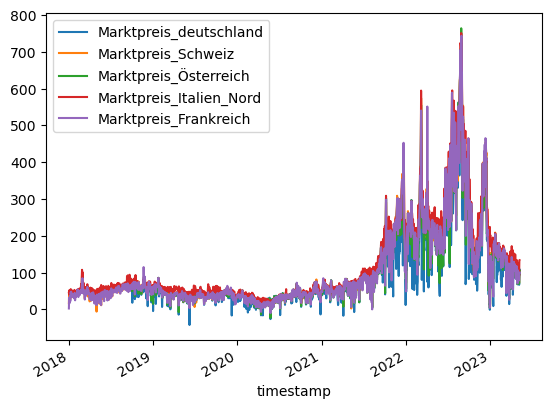

In [13]:
df_complete_price = df_complete_price.set_index('timestamp')
df_complete_price.plot()

In [15]:
df_complete_price.columns

Index(['timestamp', 'Marktpreis_deutschland', 'Marktpreis_Schweiz',
       'Marktpreis_Österreich', 'Marktpreis_Italien_Nord',
       'Marktpreis_Frankreich'],
      dtype='object')

In [17]:
df_complete_price_long = pd.read_csv('../Data/market_price_data_five_countries.csv')
df_complete_price_long.columns = ['Date','Germany','Switzerland','Austria','Italy','France']
df_complete_price_long = pd.melt(df_complete_price_long, id_vars=['Date'], var_name='country', value_name='market_price(€/MWh))')
df_complete_price_long.to_csv('../Data/market_price_data_five_countries_long.csv', index=False)
df_complete_price_long

,Date,country,market_price(€/MWh))
0,2017-12-31 23:00:00,Germany,NaN
1,2018-01-01 23:00:00,Germany,NaN
2,2018-01-02 23:00:00,Germany,NaN
3,2018-01-03 23:00:00,Germany,NaN
4,2018-01-04 23:00:00,Germany,NaN
...,...,...,...
10950,2023-12-26 23:00:00,France,NaN
10951,2023-12-27 23:00:00,France,NaN
10952,2023-12-28 23:00:00,France,NaN
10953,2023-12-29 23:00:00,France,NaN
